In [42]:
import pandas as pd
import numpy as np

from datetime import datetime 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns


In [ ]:
mpl.rcParams['figure.figsize']=(16,9)
pd.set_option('display.max_rows', 500)
%matplotlib inline
sns.set(style='darkgrid')


![CRISP_DM](../reports/figures/CRISP_DM.png)

# Explorative Data Analysis

In [10]:
data_path = '../data/processed/COVID_small_flat_table.csv'
df_plot = pd.read_csv(data_path, sep=";")
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


<Figure size 1152x648 with 0 Axes>

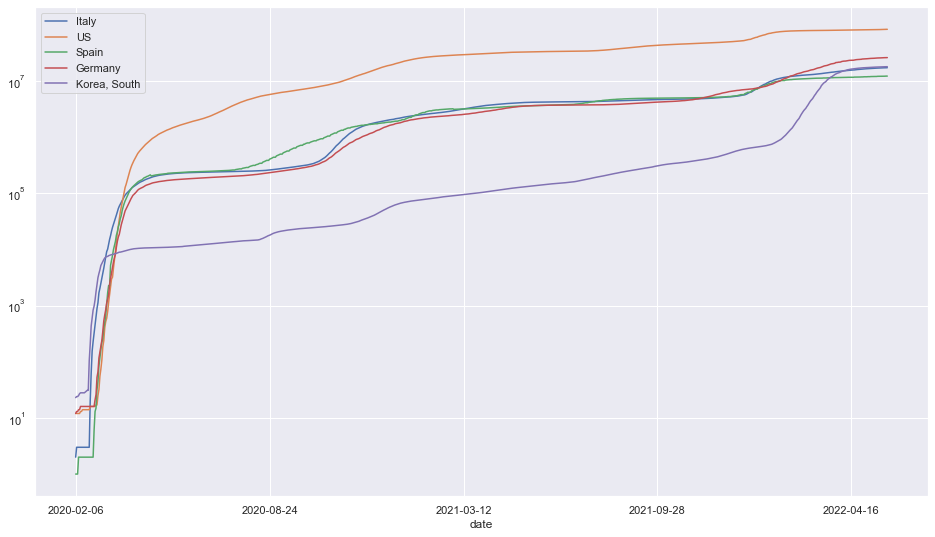

In [63]:
plt.figure()
ax = df_plot.iloc[15:,:].set_index('date').plot()
# plt.ylim(10,30000)
ax.set_yscale('log')

## Plot.ly

In [89]:
import plotly as py
import plotly.graph_objects as go

In [90]:
fig=go.Figure() 
country_list = ['Italy','US','Spain','Germany','Korea, South']
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                             y=df_plot[each], 
                             mode='markers+lines',
                             opacity = 0.9,
                             line_width = 2,
                             marker_size=4,
                             name=each
                            
                            )
                           )

fig.update_layout(
    width = 1000,
    height = 500,
    xaxis_title='Time',
    yaxis_title='Confirmed infected people (source John Hopkins case, log-scale)',
    )
fig.update_yaxes(type="log",range=[1.1,10])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show(renderer='browser')
fig.show()

In [93]:
import dash
dash.__version__
from dash import dcc
from dash import html

In [101]:
app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Korea, South', 'value': 'Korea, South'}
        ],
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [102]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each)
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }

In [ ]:
app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
